In [1]:

import numpy as np
import matplotlib.pyplot as plt

from poreUtils import *


In [2]:
# Using porespy 
import porespy as ps
import scipy.ndimage as spim
ps.visualization.set_mpl_style()
np.random.seed(1)

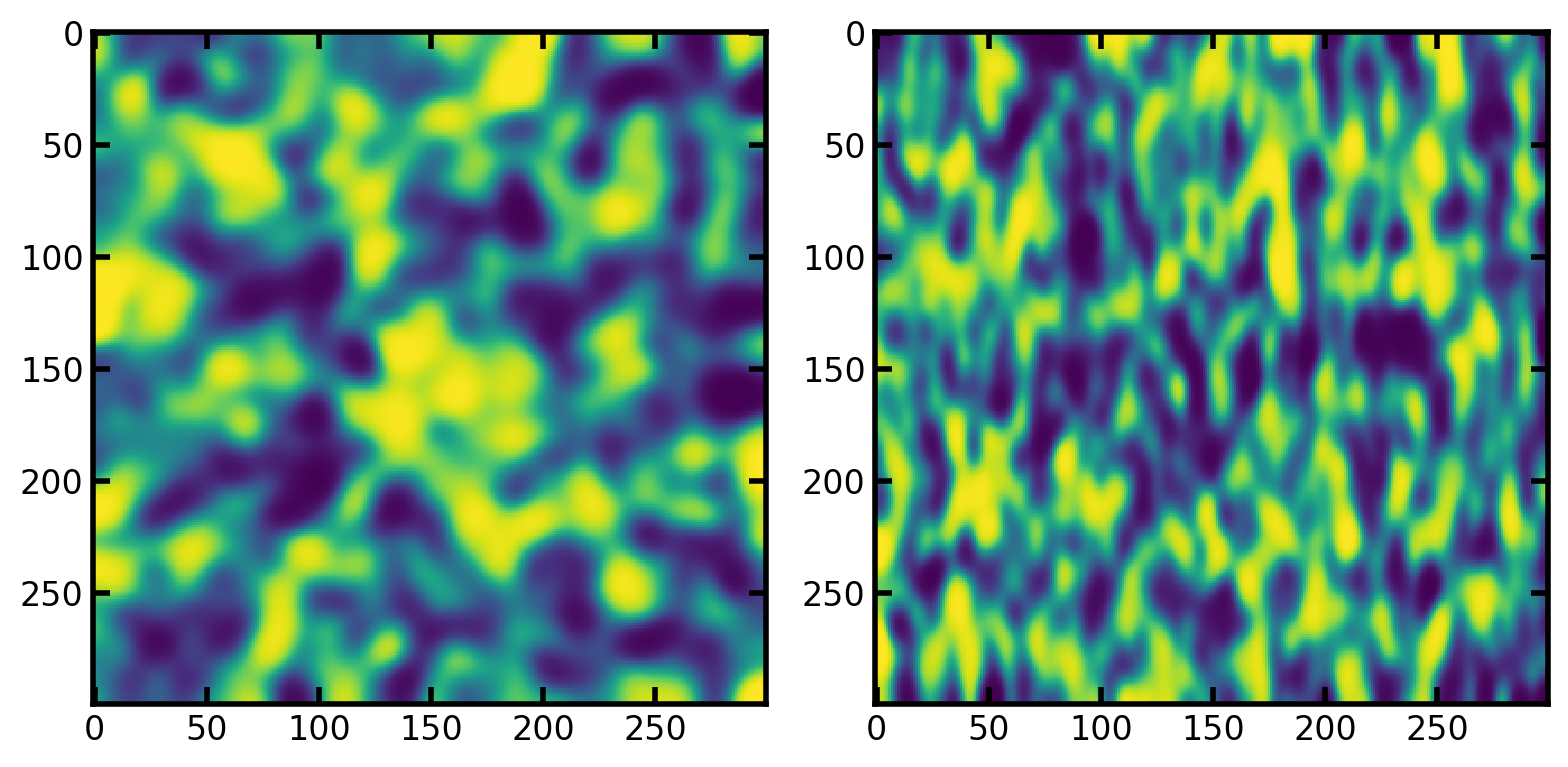

In [3]:

im1 = ps.generators.blobs(shape=[300, 300], porosity=None, blobiness=[1, 1])
im2 = ps.generators.blobs(shape=[300, 300], porosity=None, blobiness=[1, 2])
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(im1)
ax[1].imshow(im2)

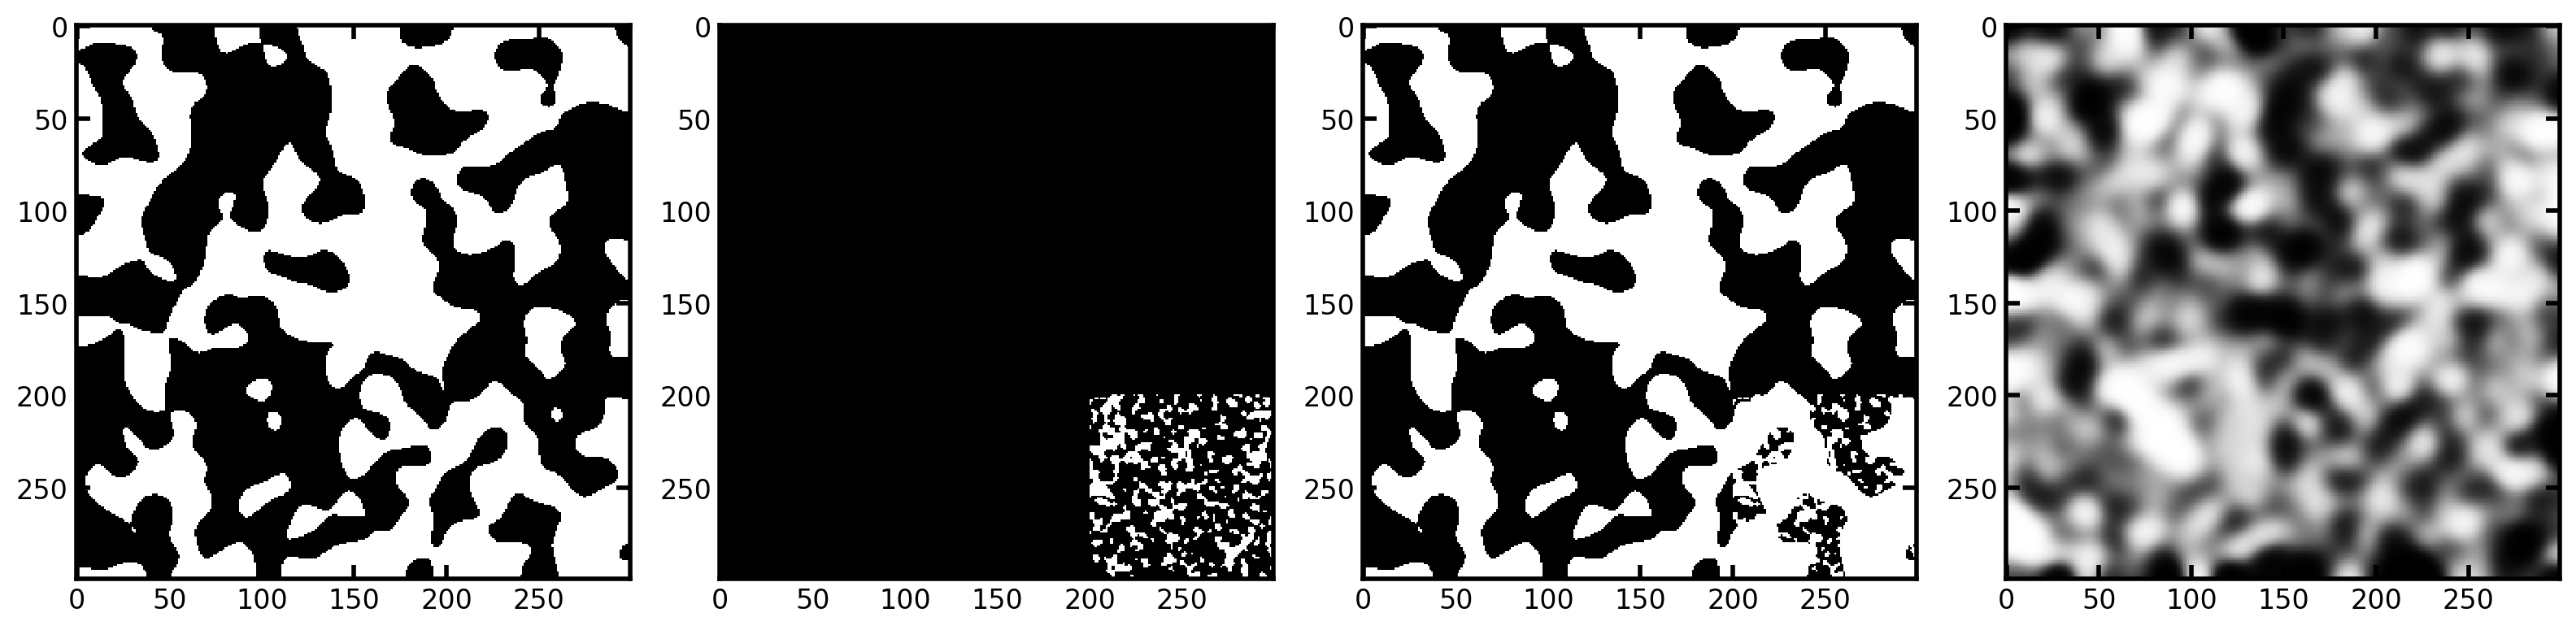

In [129]:
img1 = ps.generators.blobs(shape=(300,300), porosity=0.5, blobiness=1, seed=100)
img1_p = ps.generators.blobs(shape=(300,300), porosity=None, blobiness=1, seed=100)

img2 = np.empty(shape=(300,300), dtype=bool)
img2[0:300] = False

patch_img2 = ps.generators.blobs(shape=(100,100), porosity=0.3, blobiness=2)

img2[200:300, 200:300] = patch_img2 

fig, ax = plt.subplots(1, 4, figsize=[16, 8])
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(img2, cmap='gray')
ax[2].imshow(np.logical_or(img1, img2), cmap='gray')
# ax[3].imshow(img1*(~img2), cmap='gray')
ax[3].imshow(img1_p, cmap='gray')

plt.show()

In [ ]:
import cv2

In [33]:
import PIL 
from PIL import Image, ImageEnhance
from PIL.ImageFilter import SHARPEN

In [30]:
img = norm8bit(im1)

In [32]:
img = Image.fromarray(img)

In [37]:
img_srp = img.filter(SHARPEN)
img_srp = img_srp.filter(SHARPEN)

img_srp = img_srp.filter(SHARPEN)

img_srp = img_srp.filter(SHARPEN)


In [48]:
converter = ImageEnhance.Sharpness(img)

In [49]:
img_srp = converter.enhance(10)

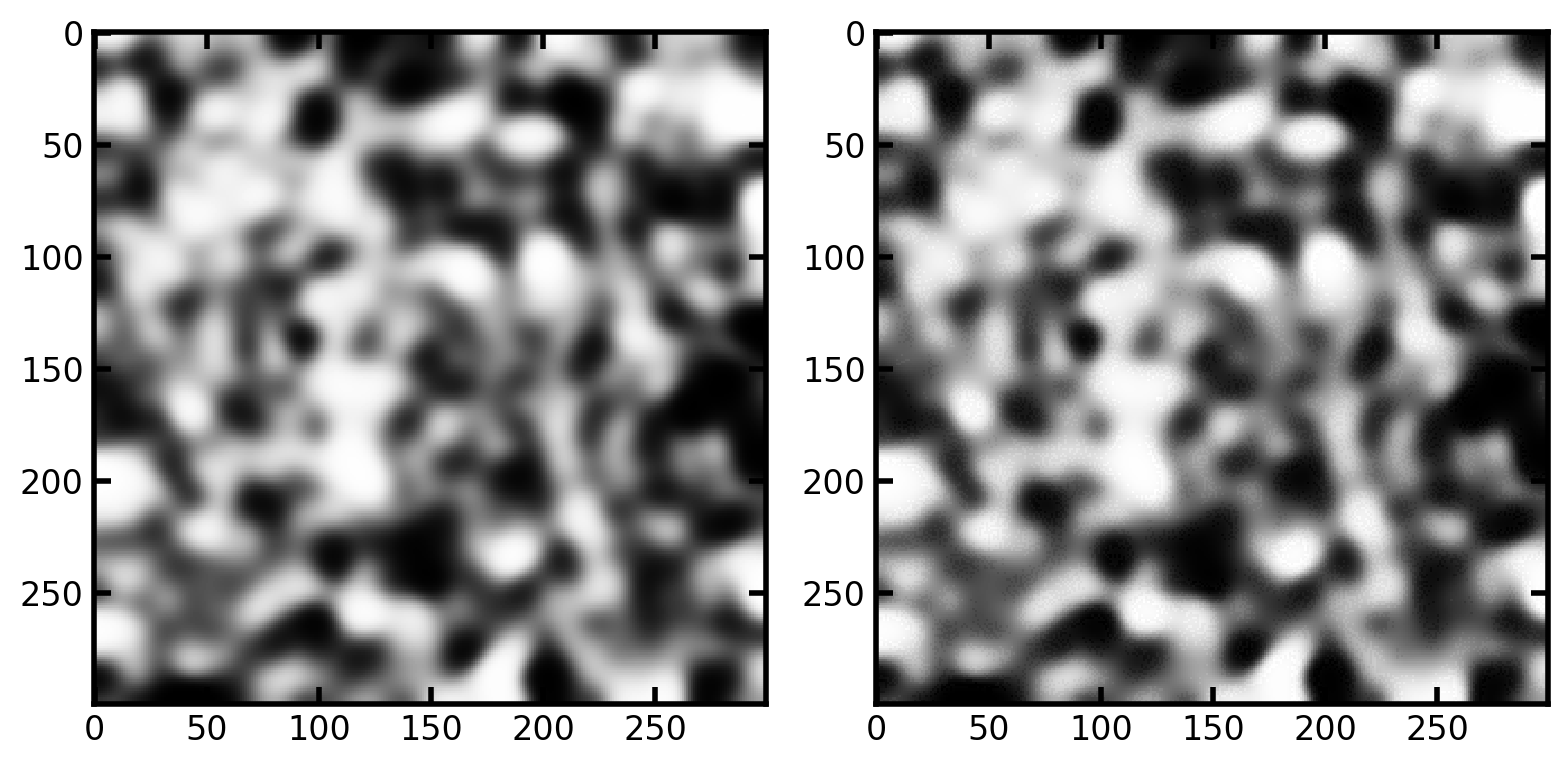

In [50]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(img, cmap='gray')
ax[1].imshow(img_srp, cmap='gray')

In [23]:
from PIL import Image, ImageFilter, ImageEnhance

# Assuming 'im1' is the original PIL image (either grayscale or RGB mode)
# If it's not in an appropriate mode, you can convert it to grayscale or RGB
# Example: If 'im1' is in RGBA mode, you can convert it to grayscale
im1 = im1.convert('L')  # 'L' mode stands for grayscale

# Applying the blur filter
degenerate_image = im1.filter(ImageFilter.SMOOTH)
converter = ImageEnhance.Sharpness(degenerate_image)

# Enhancing the sharpness (you can use a value less than 1.0 to reduce sharpness)
sharpness_factor = 2.0
enhanced_image = converter.enhance(sharpness_factor)

# Show the enhanced image (optional)
enhanced_image.show()

In [288]:
shape = (300, 300)  # Change the shape as per your requirements
mean = 2
stddev = 0.1 
noisy_img1 = img1 + np.random.normal(mean, stddev, shape)

In [289]:
# A higher weight will result in stronger sharpening
unsharp_mask_weight = 2

# Apply unsharp masking to the blurred image to sharpen it
sharpened_image = cv2.addWeighted(img1_p, 1 + unsharp_mask_weight, noisy_img1, -unsharp_mask_weight, 0)

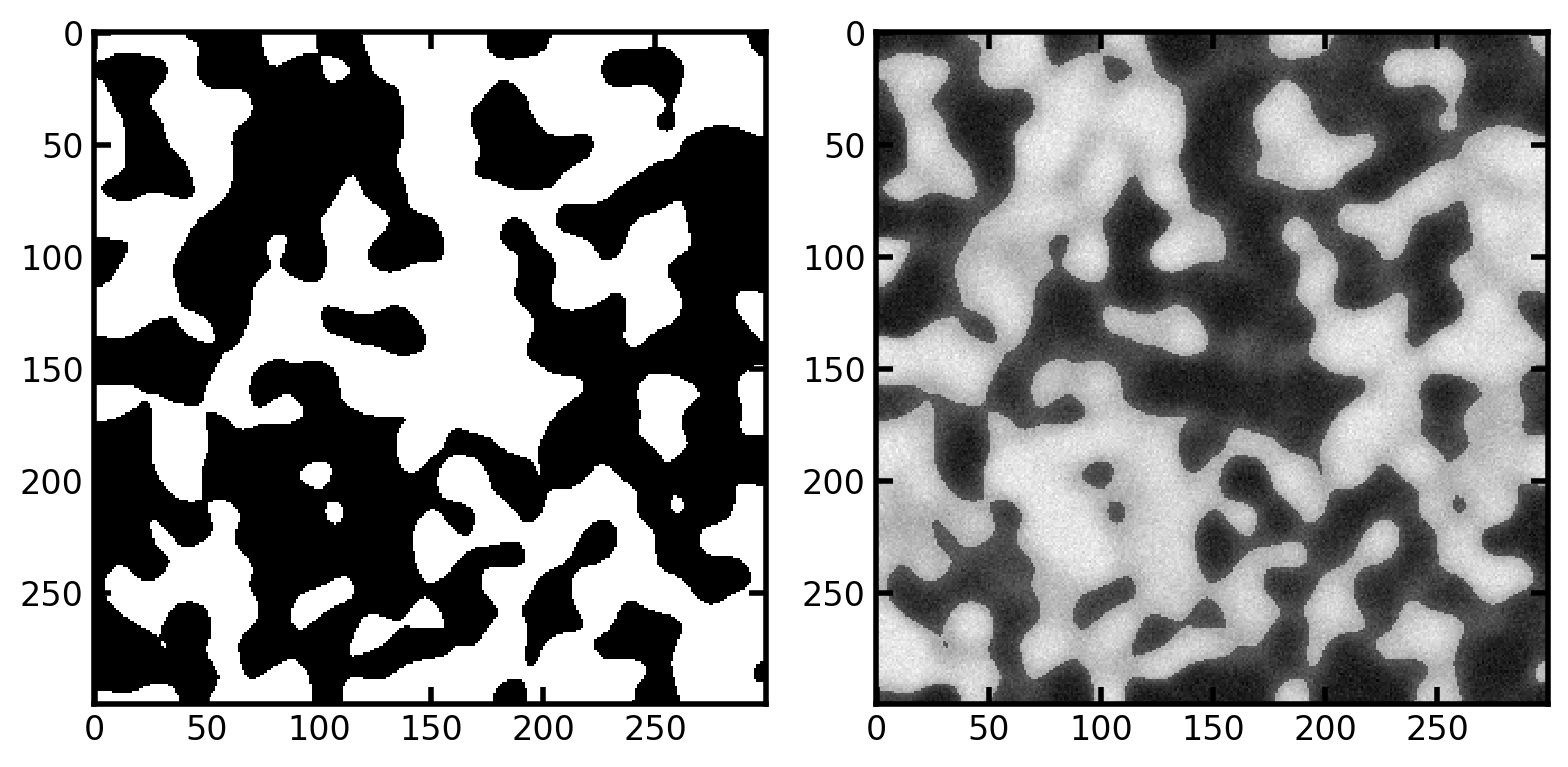

In [290]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(sharpened_image, cmap='gray')

In [292]:
ori_image = norm8bit(sharpened_image)

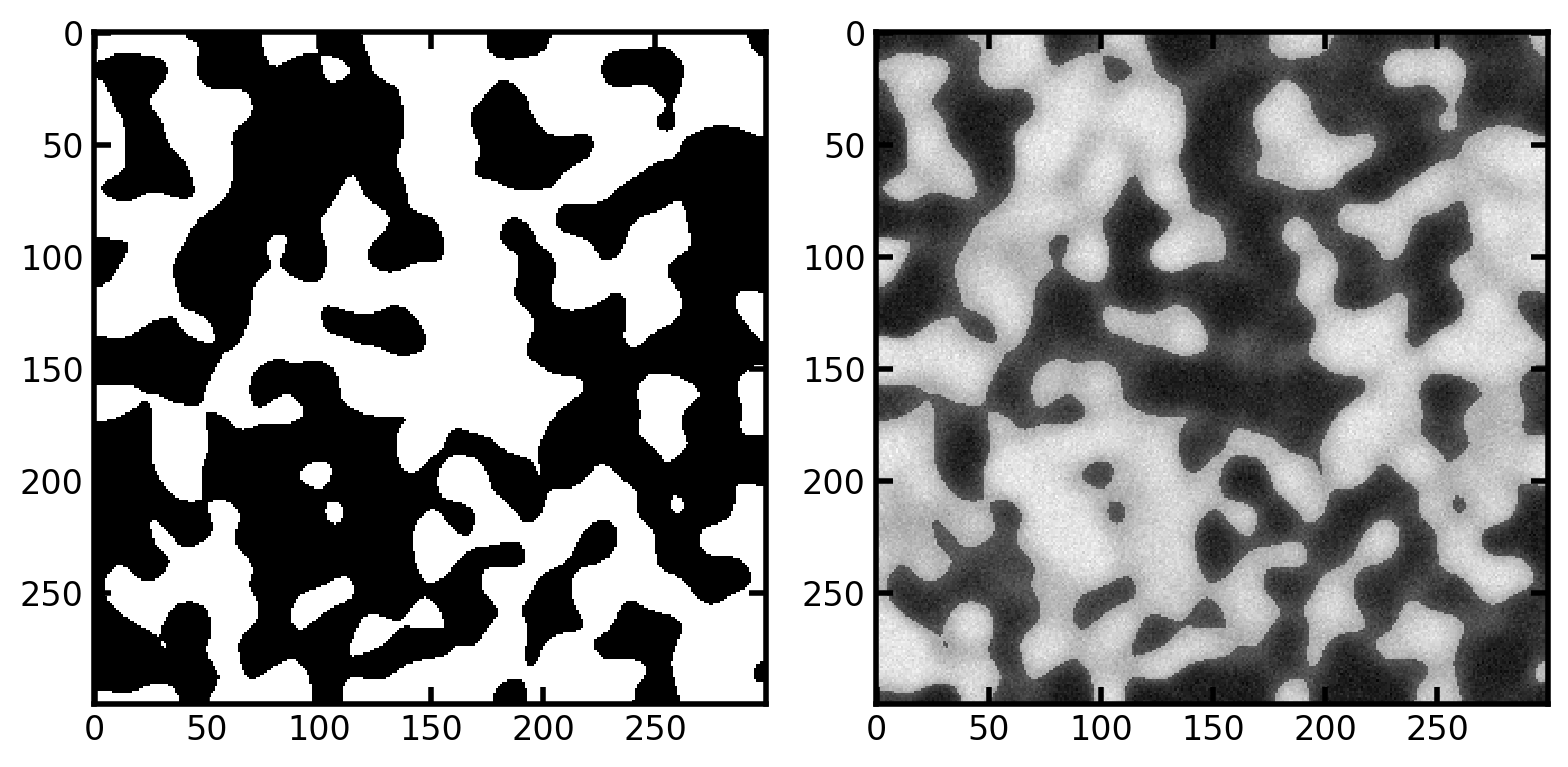

In [295]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(ori_image, cmap='gray')

In [297]:
import tifffile

In [298]:
tifffile.imsave('new_img.tif', ori_image)

C:\Users\mrahm\AppData\Local\Temp\ipykernel_31060\4058756098.py:1: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave('new_img.tif', ori_image)


In [314]:
new_air = 41.417
new_tissue = 175.190

new_diff = new_tissue - new_air

old_air = 0
old_tissue = 73.407

old_diff = old_tissue - old_air

In [315]:
imarray = (ori_image - new_air) / new_diff * old_diff + old_air
# imarray = np.clip(imarray, 0.0005, 0.003)
imarray = norm8bit(imarray)

In [316]:
tifffile.imsave('new_img_range_adjusted.tif', imarray)

C:\Users\mrahm\AppData\Local\Temp\ipykernel_31060\1167843249.py:1: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave('new_img_range_adjusted.tif', imarray)


In [233]:

shape = (300, 300)  # Change the shape as per your requirements
mean = 0
stddev = 0.5 
noisy_img1 = img1 + np.random.normal(mean, stddev, shape)

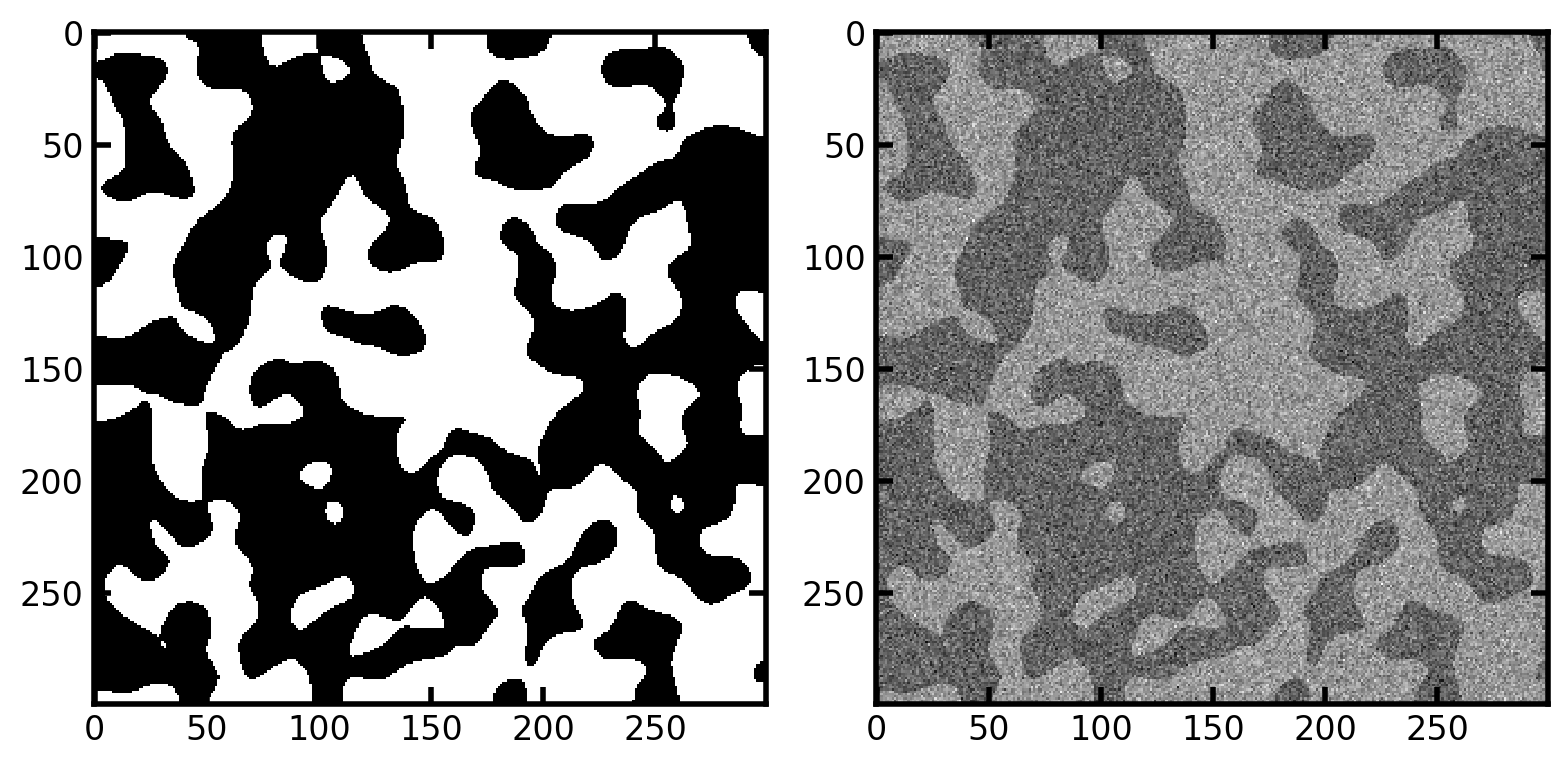

In [234]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(noisy_img1, cmap='gray')

In [263]:
# Set the standard deviation of the Gaussian kernel for blurring
blur_std_dev = 2

# Apply Gaussian blur to the noisy image
blurred_image = cv2.GaussianBlur(noisy_img1, (0, 0), blur_std_dev)

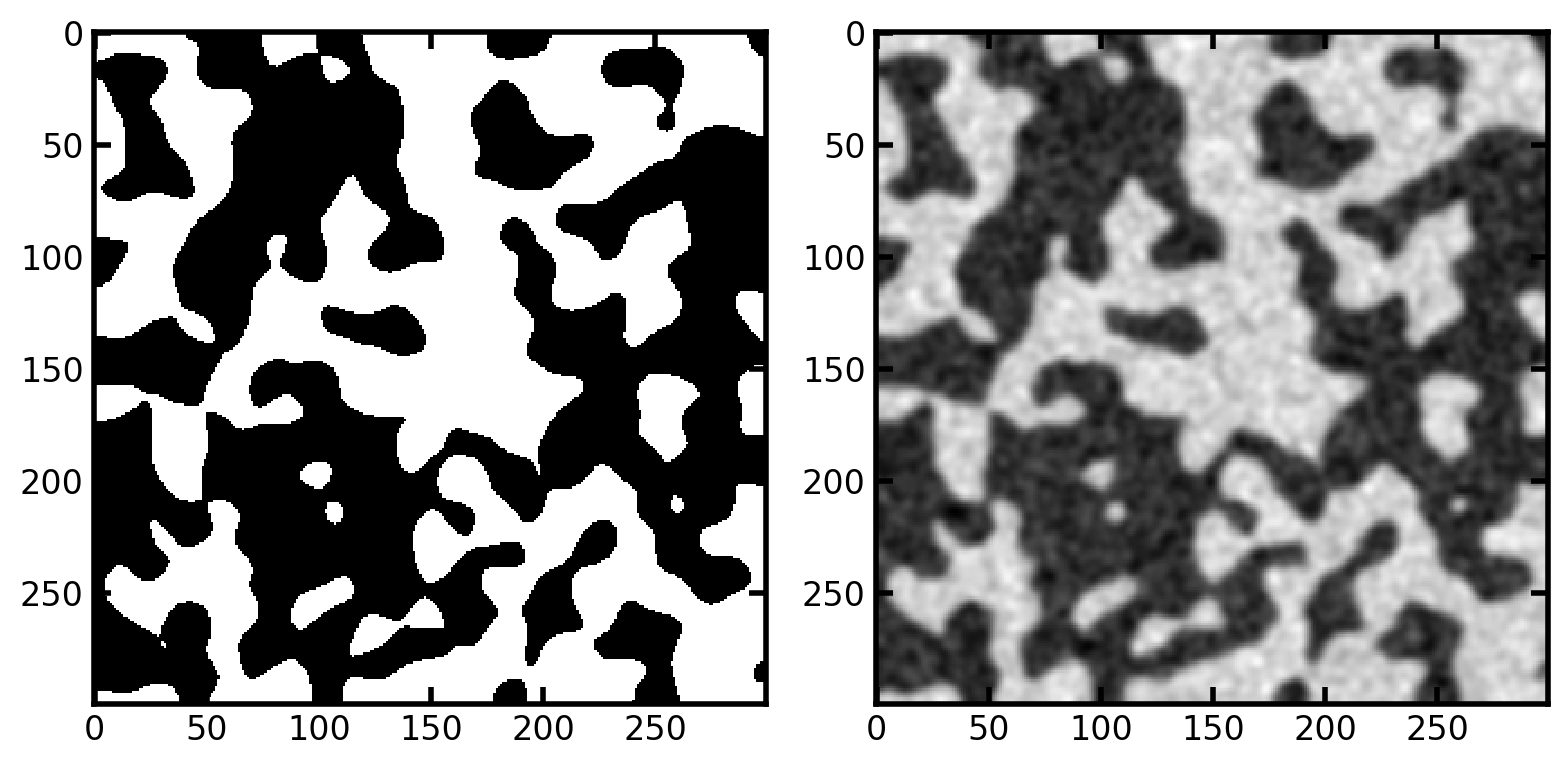

In [264]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(blurred_image, cmap='gray')

In [267]:
# A higher weight will result in stronger sharpening
unsharp_mask_weight = 0.5

# Apply unsharp masking to the blurred image to sharpen it
sharpened_image = cv2.addWeighted(blurred_image, 1 + unsharp_mask_weight, noisy_img1, -unsharp_mask_weight, 0)

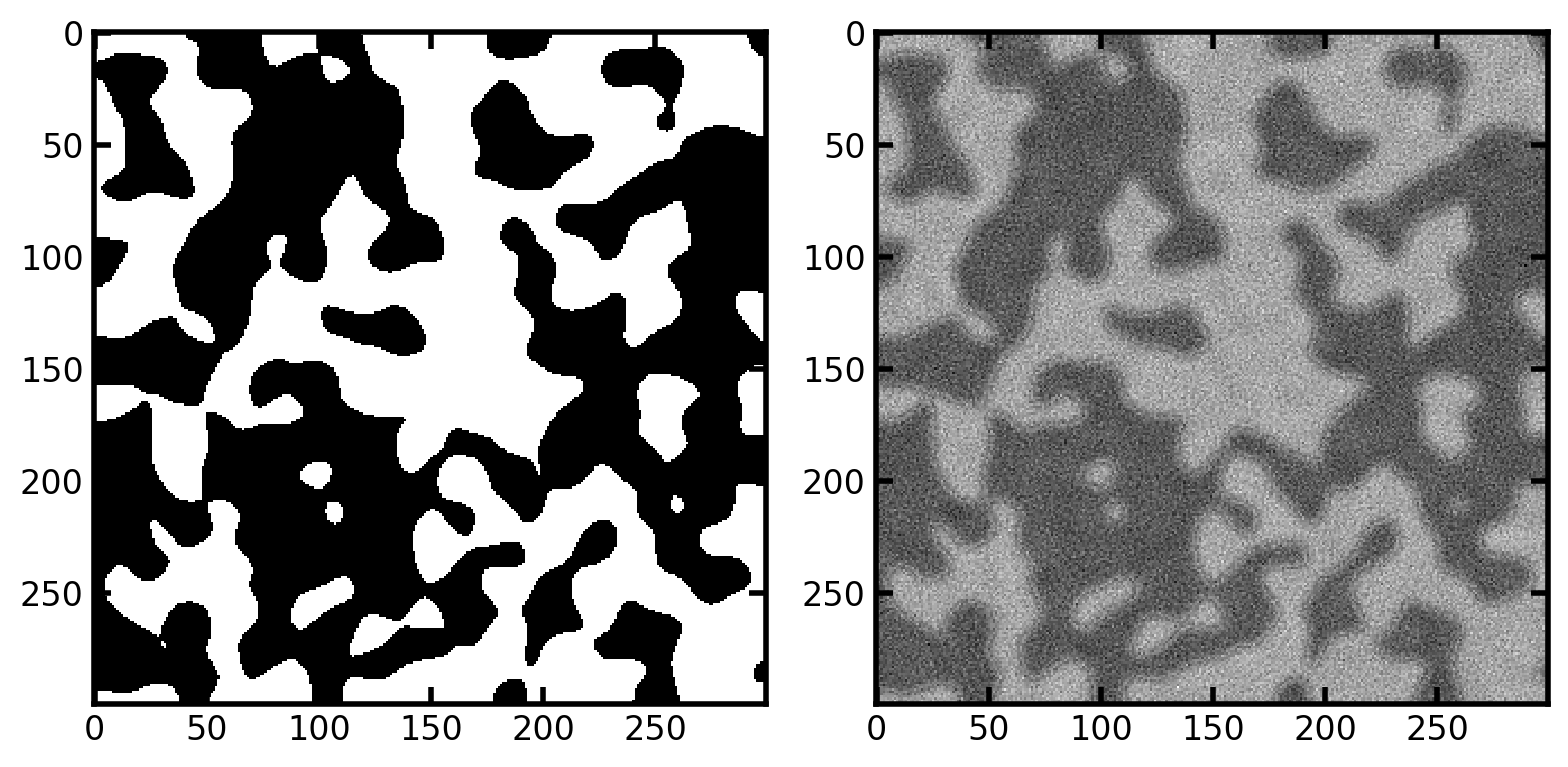

In [268]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(sharpened_image, cmap='gray')

In [273]:
# Set the standard deviation of the Gaussian kernel for blurring
blur_std_dev = 2

# Apply Gaussian blur to the noisy image
blurred_image = cv2.GaussianBlur(sharpened_image, (0, 0), blur_std_dev)

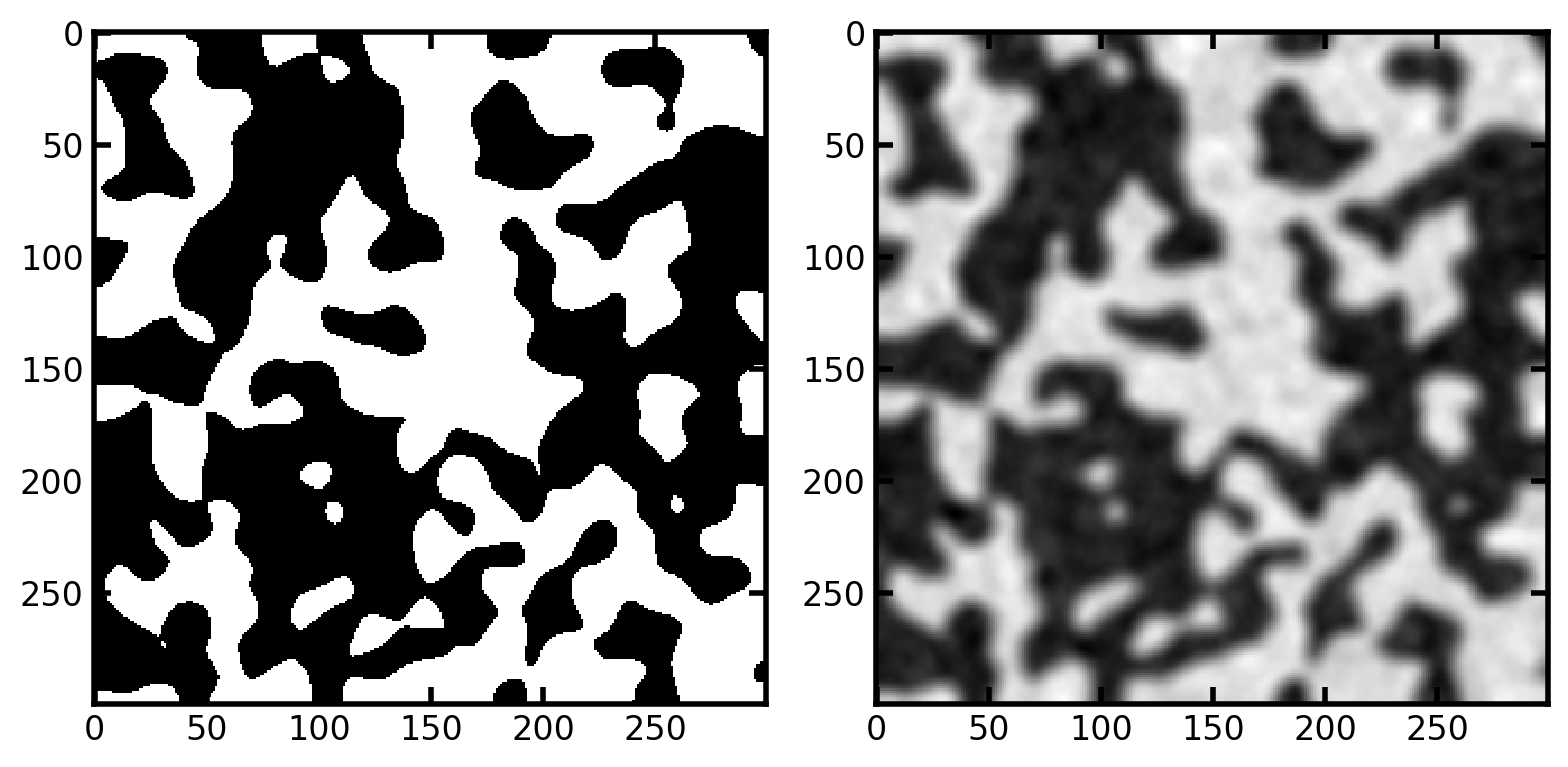

In [274]:
fig, ax = plt.subplots(1, 2, figsize=[8, 4])
ax[0].imshow(img1, cmap='gray')
ax[1].imshow(blurred_image, cmap='gray')

In [75]:
empty_image = np.empty(shape=(300,300), dtype=bool)
empty_image[0:300] = True

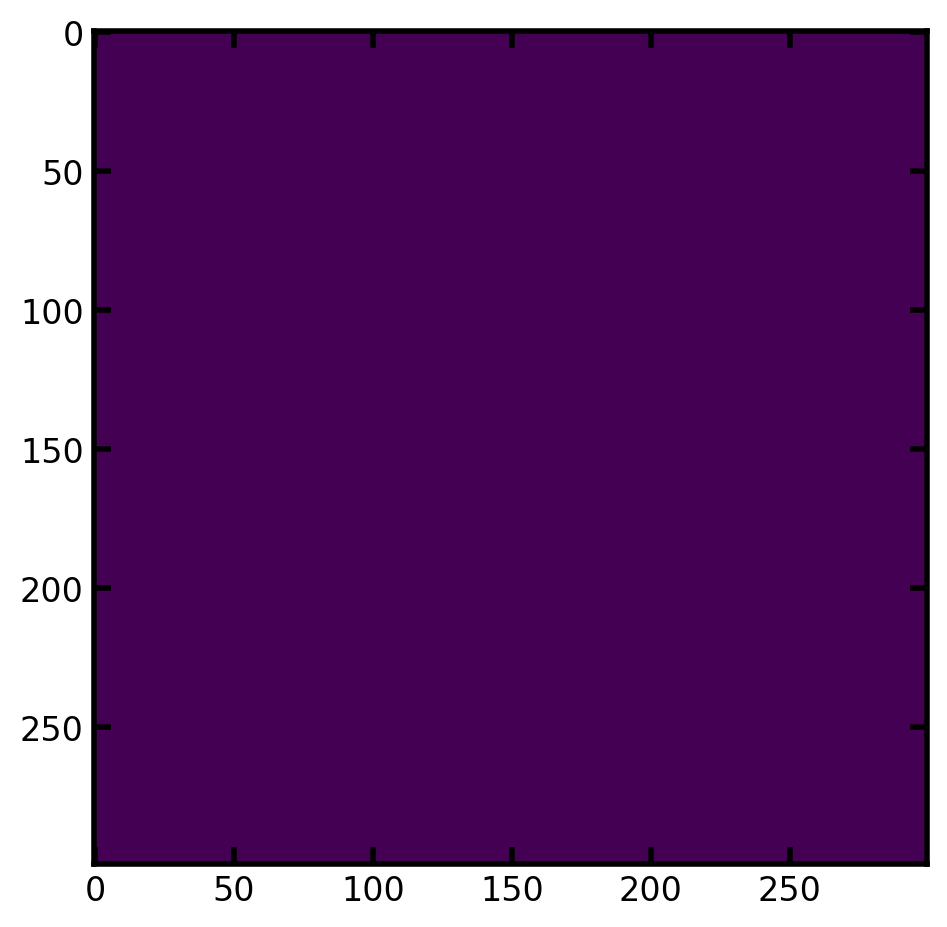

In [76]:
plt.imshow(empty_image)

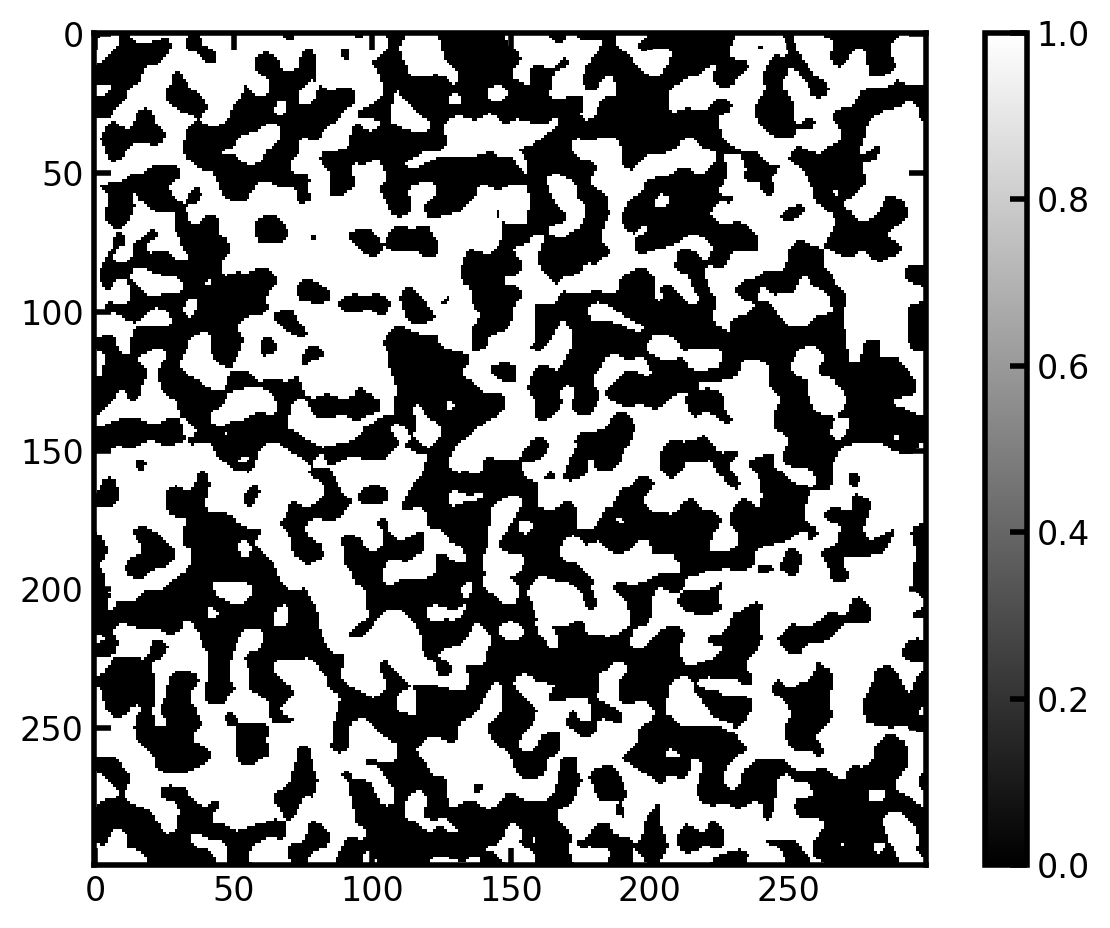

In [218]:
bin_image = ps.generators.blobs(shape=(300,300), porosity=0.5, blobiness=2.5)
plt.imshow(bin_image, cmap='gray')
plt.colorbar()
plt.show()

In [219]:
gray_image = bin_image.astype(np.uint8)*255

In [220]:
def add_gaussian_noise(image, mean=0, std_dev=25):
    # Generate random Gaussian noise with the same shape as the image
    noise = np.random.normal(mean, std_dev, size=image.shape)

    # Ensure the noisy image stays within the valid intensity range (0 to 255)
    noisy_image = np.clip(image + noise, 0, 255).astype(np.uint8)

    return noisy_image

# Set the mean and standard deviation of the Gaussian noise as per your requirement
mean = 0
std_dev = 100

noisy_image = add_gaussian_noise(gray_image, mean, std_dev)

# Set the standard deviation of the Gaussian kernel for blurring
blur_std_dev = 1

# Apply Gaussian blur to the noisy image
blurred_image = cv2.GaussianBlur(noisy_image, (0, 0), blur_std_dev)

# Set the weight of the unsharp mask
# A higher weight will result in stronger sharpening
unsharp_mask_weight = 0.2

# Apply unsharp masking to the blurred image to sharpen it
sharpened_image = cv2.addWeighted(blurred_image, 1 + unsharp_mask_weight, noisy_image, -unsharp_mask_weight, 0)


#Blurring again
blur2 = cv2.GaussianBlur(sharpened_image, (0,0), 2)

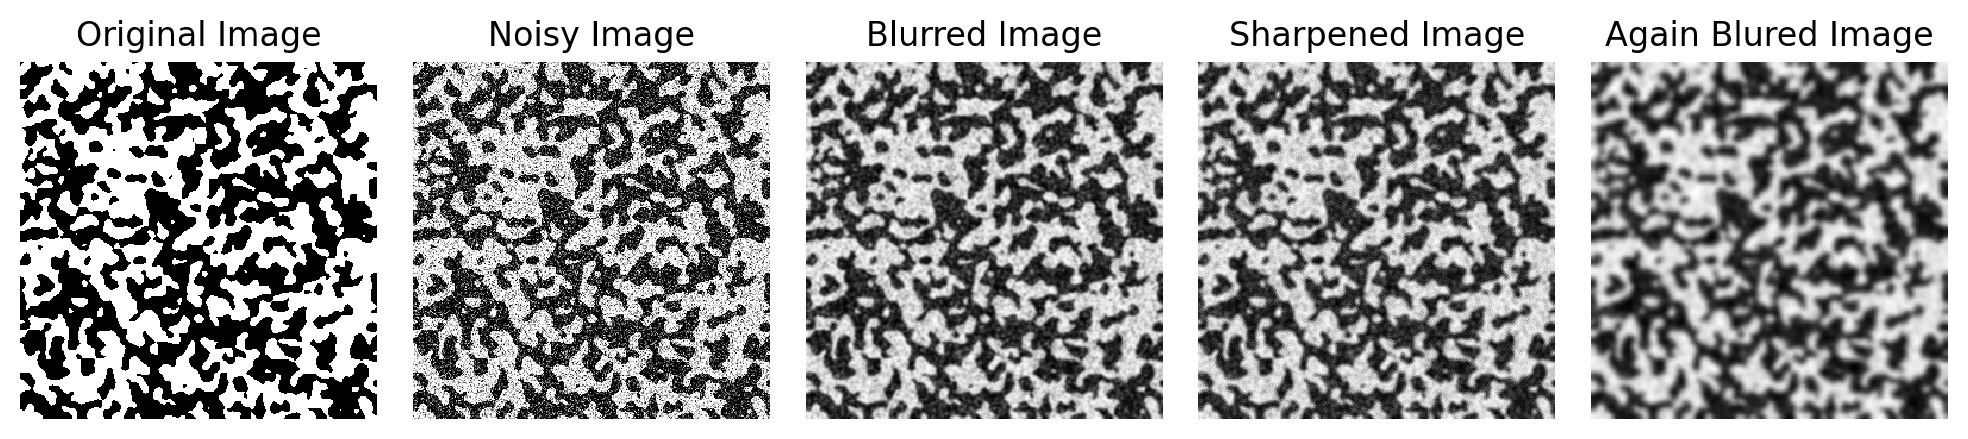

In [221]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 5, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 5, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title('Noisy Image')
plt.axis('off')


plt.subplot(1, 5, 3)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.subplot(1, 5, 4)
plt.imshow(sharpened_image, cmap='gray')
plt.title('Sharpened Image')
plt.axis('off')

plt.subplot(1, 5, 5)
plt.imshow(blur2, cmap='gray')
plt.title('Again Blured Image')
plt.axis('off')

plt.show()

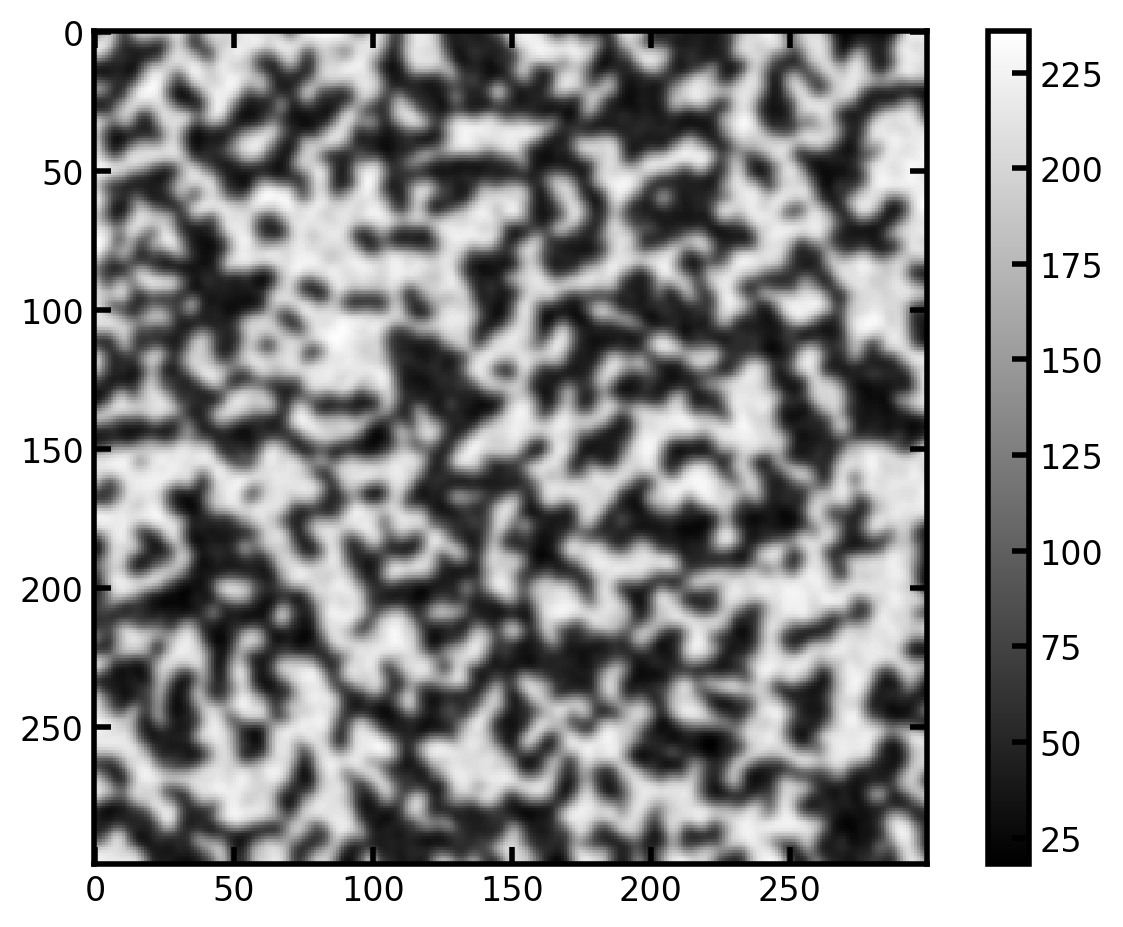

In [224]:
# Convert 'image' from 'uint8' to 'float32'
float_image = blur2.astype(np.float32)
plt.imshow(float_image, cmap='gray')
plt.colorbar()

In [202]:
from PIL import Image

In [325]:
aslice = Image.open('E:\\Data\sam_data\\new\\MD_1264_A5_1_Z0.0mm_corr_phrt\\roi\\400-700x1150-1450x2050-2350\\slice_9.tif')

In [326]:
type(aslice)

PIL.TiffImagePlugin.TiffImageFile

In [207]:
aslice = np.array(aslice)

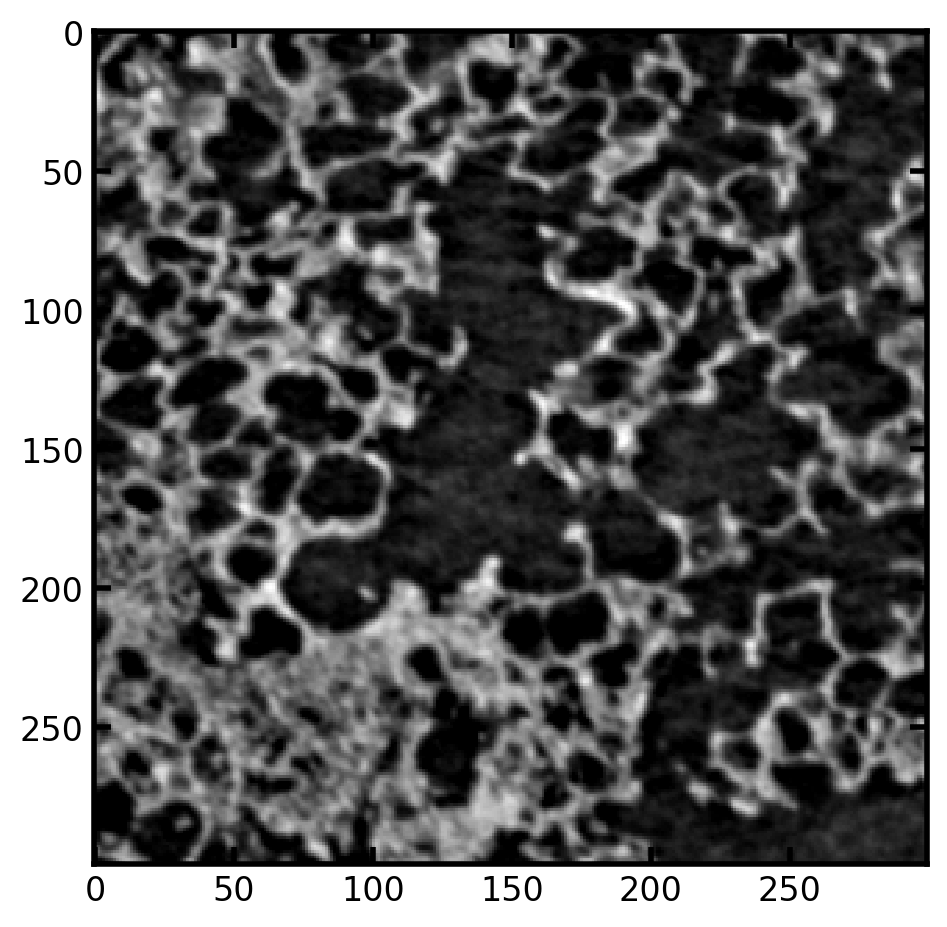

In [209]:
plt.imshow(aslice, cmap='gray')

numpy.ndarray